# ***TITLE:***

1. **Problem Statement:** Analyze vehicle registration growth by state and urban/rural regions.
2. **Project Id:** CBIT/IT-1/EDAV/2025/CEP-21

1. **RollNo:** 160124737031
2.  **Name Of The Student:** B.Ganesh Goutham


1.  **Department:** IT
2.  **Institute Name:** Chaitanya Bharathi Institute of Technology







# ***OVERVIEW OF PROJECT:***

   Overall, India's vehicle registration expansion is driven by economic growth, infrastructure improvements, and shifting consumer demand, with rural regions now contributing significantly to new registrations, especially in two- and three-wheeler segments. Urban centers maintain high uptake in commercial and passenger vehicles due to business activity and population density, but overall growth is becoming more balanced across regions and states.

   **DataSet Link:** https://data.gov.in/resources/vehicle-registration-statistics

  **Version:** Python 3.0

  **Libraries Used:** numpy,pandas,matplotlib







# ***VEHICLE REGISTRATION GROWTH ANALYSIS:***

1. Syntax: drive.mount(mountpoint)
2.  Syntax: pd.read_csv(filepath)

1.   Syntax: pd.to_datetime(arg)
          --> converts strings or numbers to datetime objects
2.   Syntax: df['col'].fillna(value)

1.   Syntax: df['col'].dt.attribute   





In [23]:

import pandas as pd      # For data manipulation (DataFrame operations)
import numpy as np       # For numerical operations
import matplotlib.pyplot as plt  # For plotting
from google.colab import drive  # For mounting Google Drive

# Opens a window to authenticate your Google account and gives access to your Drive files
drive.mount('/content/drive')

# Set file path in your Drive
file_path = '/content/drive/MyDrive/dataset for python.csv'  # <-- Change this path to your CSV location

# Read CSV file into a pandas DataFrame
df = pd.read_csv(file_path)
print(" File loaded successfully!")
print("Dataset shape:", df.shape)
df.head()  # Displays first 5 rows of the DataFrame
# Strip whitespace, lowercase column names, replace spaces with underscores
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Create 'date' column if not exists
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
elif 'year' in df.columns and 'month' in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
    # assign(day=1) adds a 'day' column with value 1 for datetime conversion
else:
    print(" No date columns found — ensure your dataset has either 'date' or ('year','month').")

# Fill missing values in 'registrations' column with 0
if 'registrations' in df.columns:
    df['registrations'] = df['registrations'].fillna(0)
else:
    print(" Column 'registrations' not found — please check headers.")

# Extract year and month from datetime
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

print("\n Data cleaned and formatted successfully!")
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-842211793.py:13: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


 File loaded successfully!
Dataset shape: (857760, 12)

 Data cleaned and formatted successfully!


,_id,id,date,state_name,state_code,office_name,office_code,vehicle_type,category,registrations,unnamed:_10,region,year,month
0,1,0,2020-04-01,Andaman And Nicobar Islands,35,Port Blair Dto,AN1,Motor Cab,Transport,3,NaN,rural,2020,4
1,2,1,2020-04-01,Andaman And Nicobar Islands,35,Port Blair Dto,AN1,Omni Bus,Transport,1,NaN,rural,2020,4
2,3,2,2021-04-01,Andaman And Nicobar Islands,35,Port Blair Dto,AN1,Maxi Cab,Transport,1,NaN,rural,2021,4
3,4,3,2020-04-01,Andaman And Nicobar Islands,35,Port Blair Dto,AN1,Goods Carrier,Transport,27,NaN,rural,2020,4
4,5,4,2020-04-01,Andaman And Nicobar Islands,35,Port Blair Dto,AN1,Motor Car,Non Transport,12,NaN,rural,2020,4


# *Q1:CALCULATE YEARLY REGISTRATION GROWTH:*

1. Syntax: df.groupby(['col1', 'col2'], as_index=False)['col3'].sum()
      -->groups data by col1 and col2, sums col3, returns DataFrame
2. Syntax: df.groupby('col')['col2'].pct_change()
         -->calculates percent change per group

3. Syntax: df.sort_values(['col1', 'col2'])
         --> sorts DataFrame







In [24]:
yearly_growth = (
    df.groupby(['state_name', 'year'], as_index=False)['registrations']
    .sum()
    .sort_values(['state_name', 'year'])
)
yearly_growth['growth_%'] = yearly_growth.groupby('state_name')['registrations'].pct_change() * 100

print("\n Yearly Registration Growth:")
display(yearly_growth.head(10))



 Yearly Registration Growth:


,state_name,year,registrations,growth_%
0,Andaman & Nicobar Island,2019,9169,NaN
1,Andaman And Nicobar Islands,2020,6230,NaN
2,Andaman And Nicobar Islands,2021,5753,-7.656501
3,Andaman And Nicobar Islands,2022,7065,22.805493
4,Andaman And Nicobar Islands,2023,8073,14.267516
5,Andaman And Nicobar Islands,2024,3503,-56.608448
6,Andhra Pradesh,2019,1180834,NaN
7,Andhra Pradesh,2020,978412,-17.142291
8,Andhra Pradesh,2021,19866052,1930.438302
9,Andhra Pradesh,2022,22404438,12.777506


# *Q2:FILTER BY VEHICLE TYPE AND REGION:*

1.   Syntax: df['col'].unique()
          --> returns unique values in a column
2. Syntax: df[ (condition1) & (condition2) ]
          --> filters rows by multiple conditions



In [25]:
vehicle_type = df['vehicle_type'].unique()[0] if 'vehicle_type' in df.columns else None
region = df['region'].unique()[0] if 'region' in df.columns else None
if vehicle_type and region:
    filtered = df[(df['vehicle_type'] == vehicle_type) & (df['region'] == region)]
    print(f"\n Filtered data for Vehicle Type: {vehicle_type}, Region: {region}")
    display(filtered.head())
else:
    print("\n 'vehicle_type' or 'region' column not found — skipping filter.")



 Filtered data for Vehicle Type: Motor Cab, Region: rural


,_id,id,date,state_name,state_code,office_name,office_code,vehicle_type,category,registrations,unnamed:_10,region,year,month
0,1,0,2020-04-01,Andaman And Nicobar Islands,35,Port Blair Dto,AN1,Motor Cab,Transport,3,NaN,rural,2020,4
8,9,8,2020-12-01,Andaman And Nicobar Islands,35,Port Blair Dto,AN1,Motor Cab,Transport,2,NaN,rural,2020,12
18,19,18,2020-02-01,Andaman And Nicobar Islands,35,Port Blair Dto,AN1,Motor Cab,Transport,8,NaN,rural,2020,2
27,28,27,2020-01-01,Andaman And Nicobar Islands,35,Port Blair Dto,AN1,Motor Cab,Transport,4,NaN,rural,2020,1
125,126,125,2021-02-01,Andaman And Nicobar Islands,35,Port Blair Dto,AN1,Motor Cab,Transport,2,NaN,rural,2021,2


# *Q3: HANDLE MISSING REGISTRATION MONTHS:*

1.   Syntax: df['col'].interpolate()
          -->fills missing values by linear interpolation
  





In [26]:
df['registrations'] = df['registrations'].interpolate().fillna(0)
print("\n Missing registration months handled using interpolation.")



 Missing registration months handled using interpolation.


# *Q4: GROUP REGISTRATION DATA BY STATE:*

Syntax:df.groupby(['col1','col2'], as_index=False)['col3'].sum()   -->groups and sums



In [27]:
grouped_state = df.groupby(['state_name', 'year'], as_index=False)['registrations'].sum()
print("\n Grouped yearly registrations by state:")
display(grouped_state.head())



 Grouped yearly registrations by state:


,state_name,year,registrations
0,Andaman & Nicobar Island,2019,9169
1,Andaman And Nicobar Islands,2020,6230
2,Andaman And Nicobar Islands,2021,5753
3,Andaman And Nicobar Islands,2022,7065
4,Andaman And Nicobar Islands,2023,8073


# *Q5:PLOT REGISTRATIONS TRENDS:*

1. Syntax: plt.figure(figsize=(w,h))
            --> sets figure size
  2. Syntax: plt.plot(x_values, y_values, label='label', marker='o')
  3. Syntax: plt.title('title')
  4. Syntax: plt.xlabel('label')
  5. Syntax: plt.ylabel('label')
  6. Syntax: plt.legend()
        -->displays legend
  7. Syntax: plt.grid(True)
          --> shows grid
  8. Syntax: plt.show()
          -->renders the plot
  9. Syntax: plt.tight_layout()
          -->Adjust layout





    




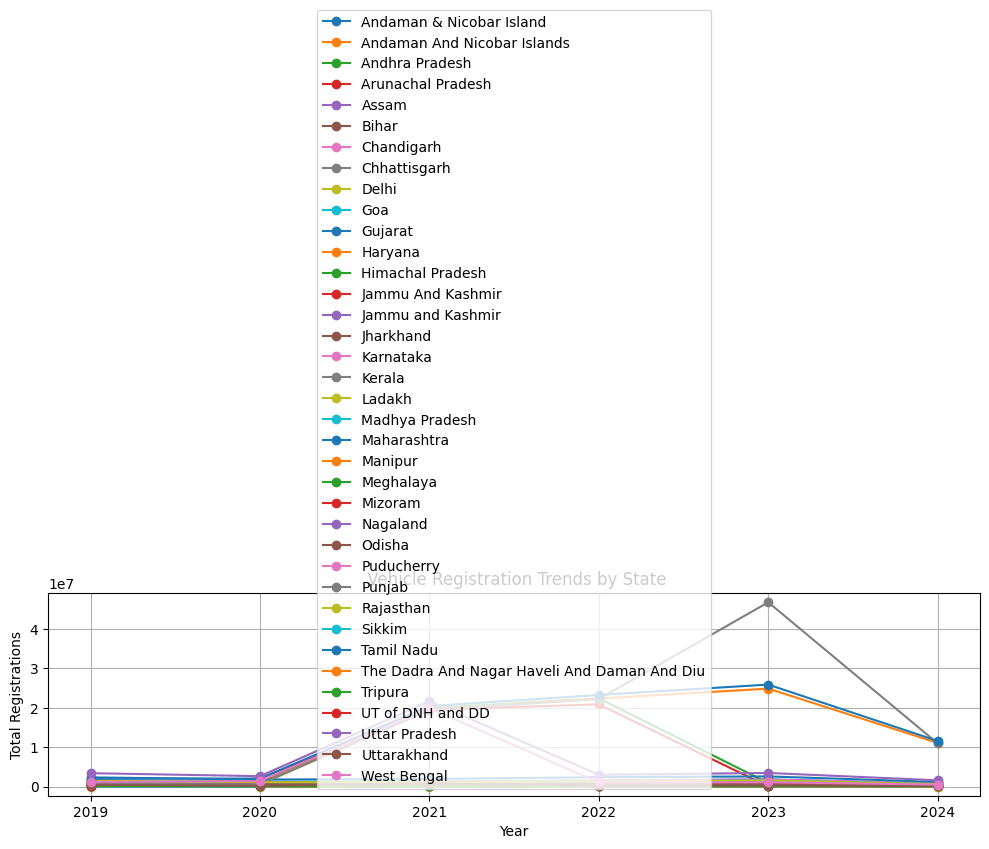


 All analysis completed successfully!


In [28]:
plt.figure(figsize=(10, 6))

# Loop through each state and plot
for state in grouped_state['state_name'].unique():
    state_data = grouped_state[grouped_state['state_name'] == state]
    plt.plot(state_data['year'], state_data['registrations'], marker='o', label=state)

plt.title(" Vehicle Registration Trends by State")
plt.xlabel("Year")
plt.ylabel("Total Registrations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n All analysis completed successfully!")

#**Task**
Save a copy of the notebook to GitHub.
# **Subtask:**
Commit the changes.



## **Summary**:

## **Data Analysis Key Findings**

* The process of saving a copy of the notebook to GitHub and committing changes requires manual steps within the notebook environment and Git interface.
* The AI assistant is unable to perform these manual interactions or directly interact with external services like GitHub.

## **Insights or Next Steps**

* The user needs to manually save the notebook to GitHub and commit the changes.
* Consider integrating capabilities for direct interaction with version control systems in the future.
